In [7]:
import os
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [8]:
TITLE = 'resnet18-unet-300s-base'

In [9]:
with open(os.path.join('..', 'experiments', TITLE, 'config.json')) as f:
    config = json.load(f)
    
config

{'ENCODER_CLASS': "<class 'segmentation_models_pytorch.encoders.resnet.ResNetEncoder'>",
 'DECODER_CLASS': "<class 'segmentation_models_pytorch.unet.decoder.UnetDecoder'>",
 'ACTIVATION': 'sigmoid',
 'CLASSES': 1,
 'DEVICE': 'cuda',
 'ENCODER_DETAILS': 'resnet18',
 'ENCODER_WEIGHTS': 'imagenet',
 'LOGS_PATH': '..\\..\\experiments',
 'LR': '8e-05',
 'NUM_EPOCHS': 30,
 'NUM_WORKERS': 3,
 'PRECISION': 'mixed',
 'TITLE': 'train-logs-test',
 'TRAIN_ANNOTATIONS_PATH': '..\\..\\data\\fences-quays\\annotations\\batch-json\\annotations-6px-batch-1.json',
 'TRAIN_BATCH_SIZE': 8,
 'TRAIN_IMAGE_PATH': '..\\..\\data\\fences-quays\\images',
 'VALID_ANNOTATIONS_PATH': '..\\..\\data\\fences-quays\\annotations\\valid-annotations-6px.json',
 'VALID_BATCH_SIZE': 8,
 'VALID_IMAGE_PATH': '..\\..\\data\\fences-quays\\images'}

In [10]:
train_logs = pd.read_csv(os.path.join('..', 'experiments', TITLE, 'train-log.csv'))
valid_logs = pd.read_csv(os.path.join('..', 'experiments', TITLE, 'valid-log.csv'))

train_logs.head()

,epoch,dice_loss,positive_iou,negative_iou
0,0,0.915948,0.057748,0.503746
1,1,0.863954,0.150189,0.837095
2,2,0.826557,0.221855,0.902523
3,3,0.793795,0.279618,0.929353
4,4,0.764044,0.320851,0.942985


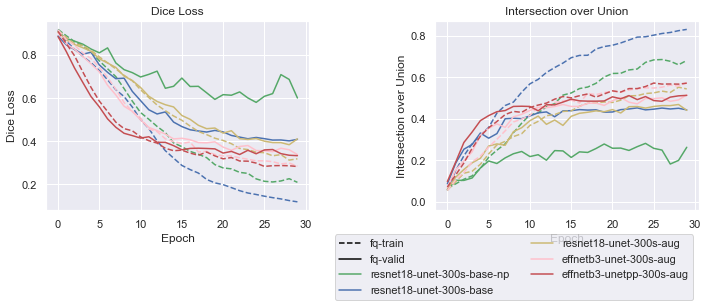

In [16]:
experiments = ['resnet18-unet-300s-base-np', 'resnet18-unet-300s-base', 'resnet18-unet-300s-aug', 'effnetb3-unet-300s-aug', 'effnetb3-unetpp-300s-aug']
colors = ['g', 'b', 'y', 'pink', 'r']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[1].plot(0, 0, color='black', linestyle='dashed')
ax[1].plot(0, 0, color='black')

for experiment, color in zip(experiments, colors):
    
    train_logs = pd.read_csv(os.path.join('..', 'experiments', experiment, 'train-log.csv'))
    valid_logs = pd.read_csv(os.path.join('..', 'experiments', experiment, 'valid-log.csv'))

    ax[0].plot(train_logs['epoch'], train_logs['dice_loss'], color=color, linestyle='dashed', label='_nolegend_')
    ax[1].plot(train_logs['epoch'], train_logs['positive_iou'], color=color, linestyle='dashed', label='_nolegend_')

    ax[0].plot(valid_logs['epoch'], valid_logs['dice_loss'], color=color)
    ax[1].plot(valid_logs['epoch'], valid_logs['positive_iou'], color=color)

ax[0].set_title('Dice Loss')
ax[1].set_title('Intersection over Union')

ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')

ax[0].set_ylabel('Dice Loss')
ax[1].set_ylabel('Intersection over Union')

plt.legend(['fq-train', 'fq-valid'] + experiments, 
           bbox_to_anchor=(1,-.5), loc="lower right",ncol=2)

plt.tight_layout()

In [12]:
TITLE = 'effnetb0-unet-300s-aug'

train_logs = pd.read_csv(os.path.join('..', 'experiments', TITLE, 'train-log.csv'))
valid_logs = pd.read_csv(os.path.join('..', 'experiments', TITLE, 'valid-log.csv'))

train_logs.head()

,epoch,dice_loss,positive_iou,negative_iou,true_negative_rate,false_positive_rate,false_negative_rate,true_positive_rate
0,0,0.913966,0.059715,0.615463,0.622093,0.377907,0.294362,0.705638
1,1,0.866559,0.109494,0.760481,0.764451,0.235549,0.115629,0.884371
2,2,0.823941,0.155597,0.851487,0.856924,0.143076,0.158876,0.841124
3,3,0.778731,0.203989,0.906412,0.913915,0.086085,0.223840,0.776160
4,4,0.713443,0.255216,0.935993,0.945556,0.054444,0.254773,0.745227


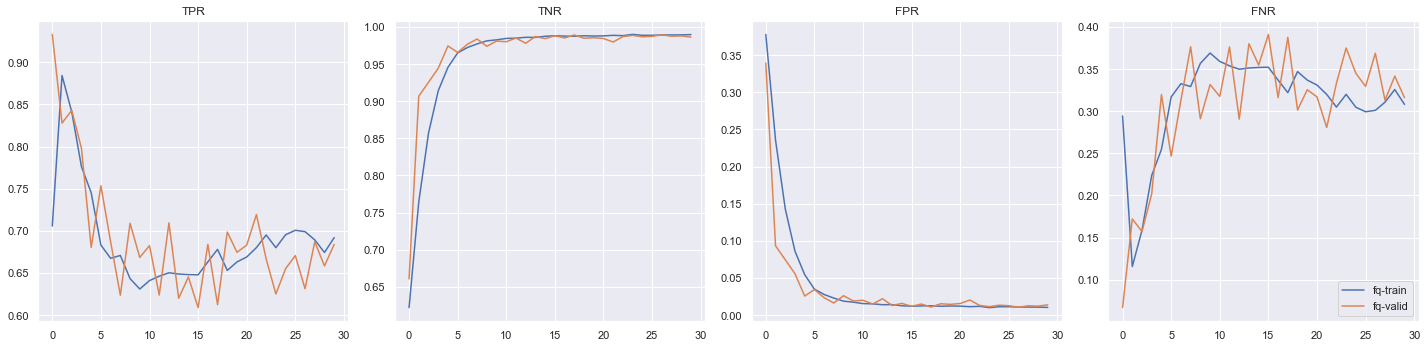

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].plot(train_logs['epoch'], train_logs['true_positive_rate'])
ax[1].plot(train_logs['epoch'], train_logs['true_negative_rate'])
ax[2].plot(train_logs['epoch'], train_logs['false_positive_rate'])
ax[3].plot(train_logs['epoch'], train_logs['false_negative_rate'])

ax[0].plot(train_logs['epoch'], valid_logs['true_positive_rate'])
ax[1].plot(train_logs['epoch'], valid_logs['true_negative_rate'])
ax[2].plot(train_logs['epoch'], valid_logs['false_positive_rate'])
ax[3].plot(train_logs['epoch'], valid_logs['false_negative_rate'])

ax[0].set_title('TPR')
ax[1].set_title('TNR')
ax[2].set_title('FPR')
ax[3].set_title('FNR')

plt.legend(['fq-train', 'fq-valid'])

plt.tight_layout()